In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cars_sample.csv')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,17/03/2016 15:47,Ford_Focus_Turnier_1.6_TDCi_DPF_Connection,private,offer,3200,test,station wagon,2006,manual,109,focus,150000,7,diesel,ford,no,17/03/2016 0:00,44534,17/03/2016 15:47
1,03/04/2016 21:47,Mazda_6_SKYACTIV_D_175_2_2_Sports_Line_5Jahre_...,private,offer,30900,test,limousine,2015,automatic,175,6_reihe,20000,6,diesel,mazda,no,03/04/2016 0:00,63808,05/04/2016 22:47
2,23/03/2016 1:57,Opel_Vectra_B_1.6._101_PS_._Nur_91_tkm_._Gepfl...,private,offer,1600,test,limousine,1998,manual,101,NaN,100000,8,petrol,opel,no,23/03/2016 0:00,24983,07/04/2016 4:46
3,24/03/2016 13:39,Volkswagen_Polo_60_Servo,private,offer,999,control,small car,1996,automatic,60,polo,125000,12,petrol,volkswagen,no,24/03/2016 0:00,32049,07/04/2016 4:45
4,09/03/2016 23:44,A_Klasse_nicht_fahrbereit,private,offer,400,test,small car,1999,manual,0,a_klasse,150000,0,petrol,mercedes_benz,yes,09/03/2016 0:00,72762,14/03/2016 5:44


In [3]:
df.shape

(50000, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null int64
abtest                 50000 non-null object
vehicleType            44870 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47337 non-null object
powerPS                50000 non-null int64
model                  47332 non-null object
kilometer              50000 non-null int64
monthOfRegistration    50000 non-null int64
fuelType               45544 non-null object
brand                  50000 non-null object
notRepairedDamage      40228 non-null object
dateCreated            50000 non-null object
postalCode             50000 non-null int64
lastSeen               50000 non-null object
dtypes: int64(6), object(13)
memory usage:

In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000000e+04,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,5.325941e+04,2004.494060,115.64740,125588.700000,5.741740,50911.446000
std,9.620356e+06,81.446313,177.38175,40217.039679,3.710105,25845.348279
min,0.000000e+00,1000.000000,0.00000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,70.00000,125000.000000,3.000000,30519.000000
50%,2.950000e+03,2003.000000,105.00000,150000.000000,6.000000,49632.000000
75%,7.300000e+03,2008.000000,150.00000,150000.000000,9.000000,71686.000000
max,2.147484e+09,9999.000000,16312.00000,150000.000000,12.000000,99998.000000


In [6]:
df.drop(['seller', 'offerType', 'dateCrawled', 'lastSeen', 'postalCode', 'dateCreated'], 
        axis='columns', inplace=True)

In [7]:
df.isnull().sum()

name                      0
price                     0
abtest                    0
vehicleType            5130
yearOfRegistration        0
gearbox                2663
powerPS                   0
model                  2668
kilometer                 0
monthOfRegistration       0
fuelType               4456
brand                     0
notRepairedDamage      9772
dtype: int64

In [8]:
print("Too new: %d" % df.loc[df.yearOfRegistration >= 2017].count()['name'])
print("Too old: %d" % df.loc[df.yearOfRegistration < 1950].count()['name'])
print("Too cheap: %d" % df.loc[df.price < 100].count()['name'])
print("Too expensive: %d"  % df.loc[df.price > 150000].count()['name'])
print("Too few km: %d"  % df.loc[df.kilometer <= 5000].count()['name'])
print("Too many km: %d"  % df.loc[df.kilometer >= 150000].count()['name'])
print("Too few powerPS: %d"  % df.loc[df.powerPS < 10].count()['name'])
print("Too many powerPS: %d"  % df.loc[df.powerPS > 500].count()['name'])

Too new: 1974
Too old: 37
Too cheap: 1794
Too expensive: 40
Too few km: 970
Too many km: 32399
Too few powerPS: 5506
Too many powerPS: 120


In [9]:
# df['notRepairedDamage'].fillna(value='not-declared', inplace=True)
# df['fuelType'].fillna(value='not-declared', inplace=True)
# df['gearbox'].fillna(value='not-declared', inplace=True)
# df['vehicleType'].fillna(value='not-declared', inplace=True)
# df['model'].fillna(value='not-declared', inplace=True)

In [10]:
df.fillna(value='not-declared', inplace=True)

In [11]:
df.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Ford_Focus_Turnier_1.6_TDCi_DPF_Connection,3200,test,station wagon,2006,manual,109,focus,150000,7,diesel,ford,no
1,Mazda_6_SKYACTIV_D_175_2_2_Sports_Line_5Jahre_...,30900,test,limousine,2015,automatic,175,6_reihe,20000,6,diesel,mazda,no
2,Opel_Vectra_B_1.6._101_PS_._Nur_91_tkm_._Gepfl...,1600,test,limousine,1998,manual,101,not-declared,100000,8,petrol,opel,no
3,Volkswagen_Polo_60_Servo,999,control,small car,1996,automatic,60,polo,125000,12,petrol,volkswagen,no
4,A_Klasse_nicht_fahrbereit,400,test,small car,1999,manual,0,a_klasse,150000,0,petrol,mercedes_benz,yes


In [12]:
cat_vars=['abtest','gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']

In [13]:
encoder = {}
for col in cat_vars:
    print ('Processing ', col)
    le = preprocessing.LabelEncoder()    
    le.fit(df[col])
    df[col] = le.fit_transform(df[col])

('Processing ', 'abtest')
('Processing ', 'gearbox')
('Processing ', 'notRepairedDamage')
('Processing ', 'model')
('Processing ', 'brand')
('Processing ', 'fuelType')
('Processing ', 'vehicleType')


In [14]:
df.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Ford_Focus_Turnier_1.6_TDCi_DPF_Connection,3200,1,7,2006,1,109,103,150000,7,1,10,0
1,Mazda_6_SKYACTIV_D_175_2_2_Sports_Line_5Jahre_...,30900,1,3,2015,0,175,17,20000,6,1,19,0
2,Opel_Vectra_B_1.6._101_PS_._Nur_91_tkm_._Gepfl...,1600,1,3,1998,1,101,161,100000,8,7,24,0
3,Volkswagen_Polo_60_Servo,999,0,6,1996,0,60,174,125000,12,7,38,0
4,A_Klasse_nicht_fahrbereit,400,1,6,1999,1,0,33,150000,0,7,20,2


In [15]:
df.shape

(50000, 13)

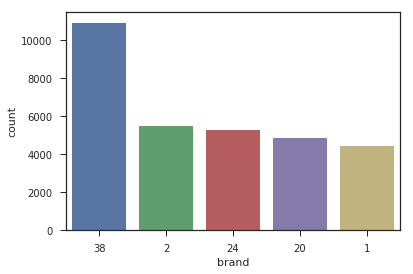

In [16]:
sns.countplot(x=df['brand'],order=pd.value_counts(df['brand']).iloc[:5].index)

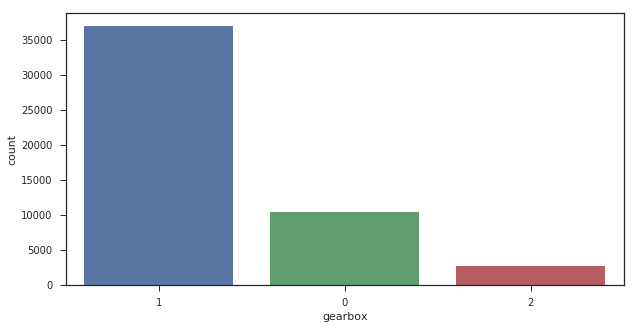

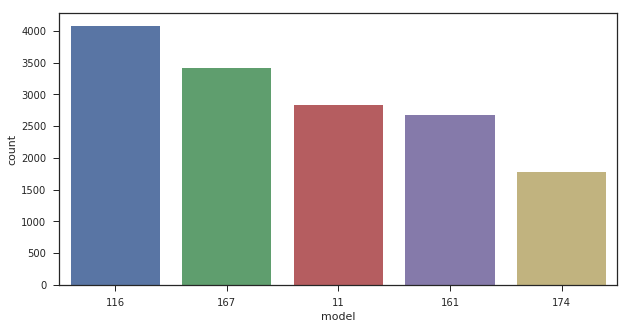

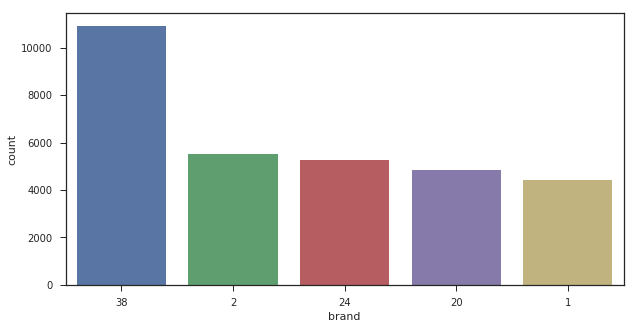

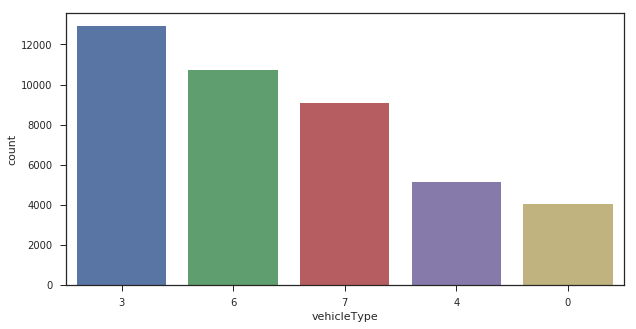

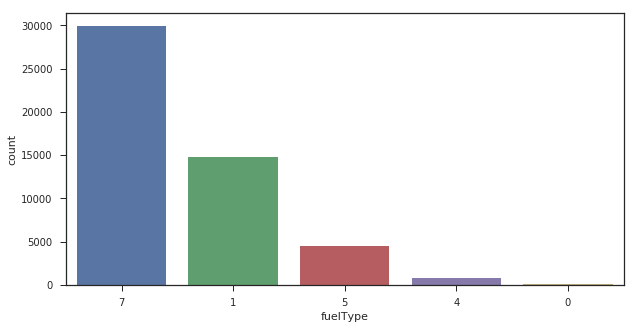

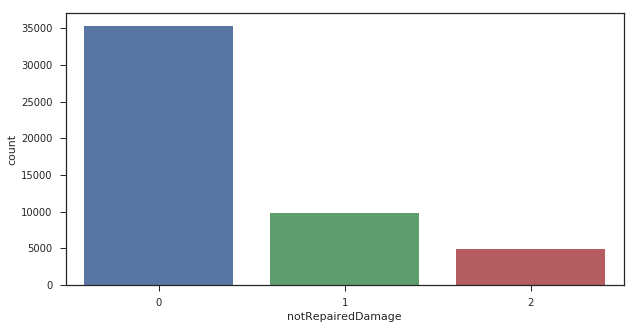

In [17]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']
for i in categories:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df[i],order=pd.value_counts(df[i]).iloc[:5].index)
    plt.show()

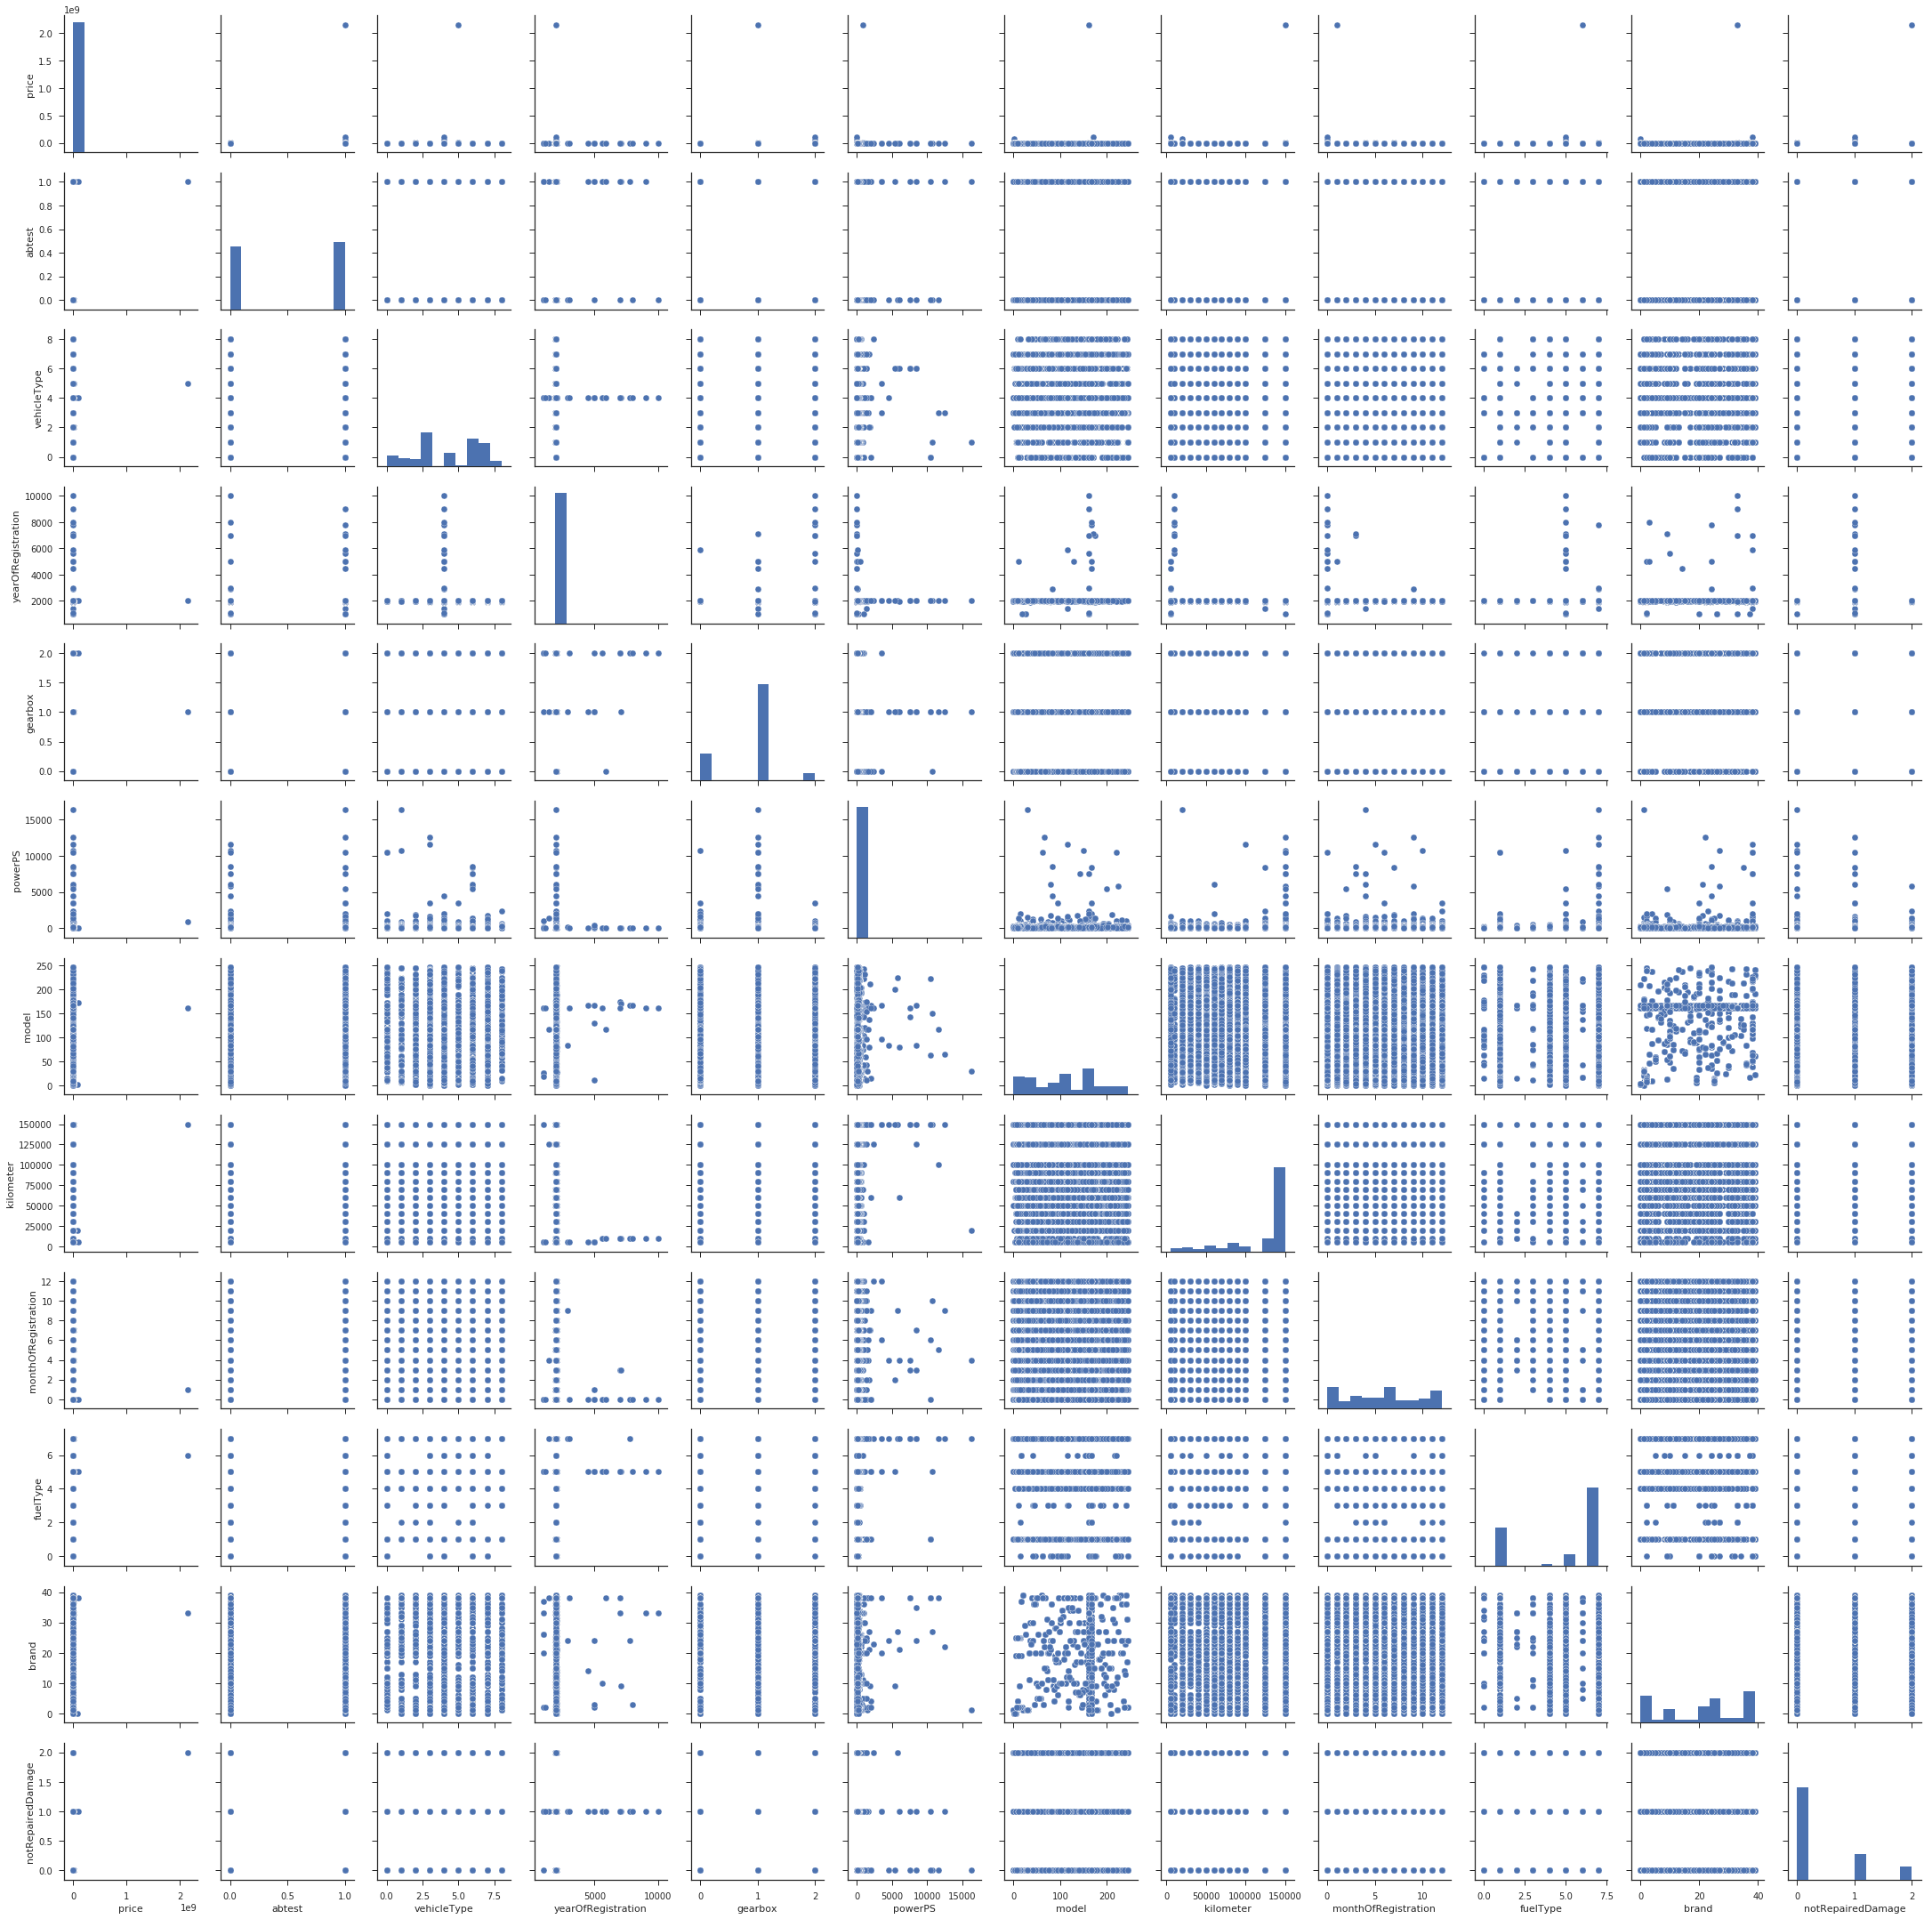

In [18]:
sns.pairplot(df)

In [19]:
corr = df.corr()

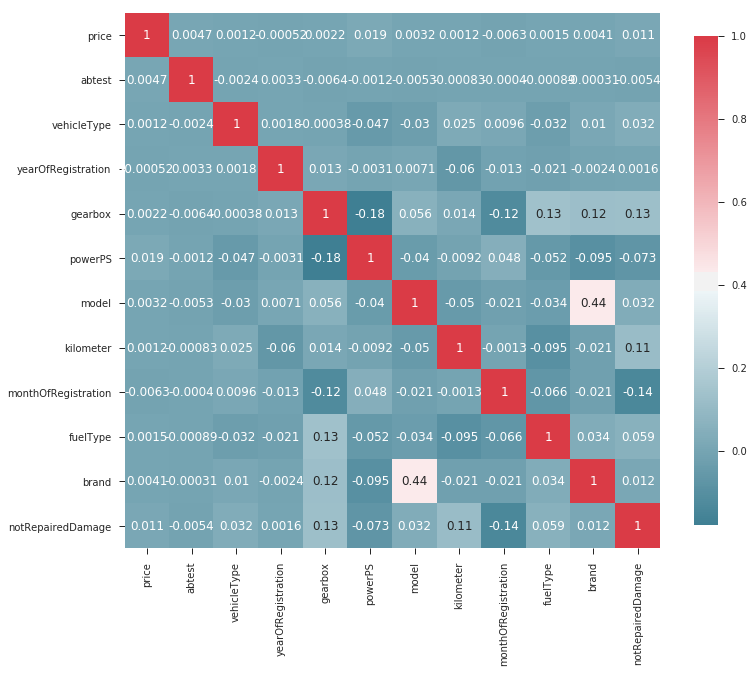

In [20]:
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [21]:
df.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                0.019442
notRepairedDamage      0.011040
monthOfRegistration    0.006297
abtest                 0.004704
brand                  0.004081
model                  0.003151
gearbox                0.002211
fuelType               0.001526
vehicleType            0.001240
kilometer              0.001197
yearOfRegistration     0.000520
Name: price, dtype: float64